In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use("dark_background")
plt.style.use("ggplot")
plt.rc('font', family='Malgun Gothic')
pd.set_option('display.max_columns', None)

In [2]:
dataset = pd.read_excel("영화 데이터.xlsx")

In [3]:
dataset.shape

(40940, 18)

In [4]:
# 영화 개봉 후 발생하는 데이터 제거

dataset = dataset.drop(['순위', '매출액', '점유율', '관객수', '누적관객수', '스크린수', '상영횟수', '국적'], axis=1)

In [5]:
dataset.dtypes

영화명              object
개봉일      datetime64[ns]
누적매출액             int64
대표국적             object
제작사              object
배급사              object
등급               object
장르               object
감독               object
배우               object
dtype: object

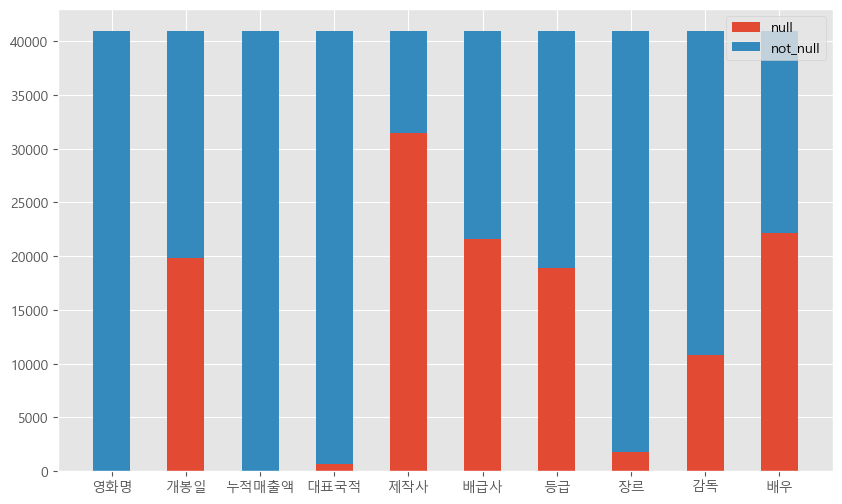

In [6]:
# 결측치 비교

null = dataset.isnull().sum()
not_null = dataset.notnull().sum()

plt.figure(figsize=(10, 6))
plt.bar(dataset.columns, null, label='null', width=0.5)
plt.bar(dataset.columns, not_null, label='not_null', width=0.5, bottom=null)
plt.legend()

In [65]:
df = dataset.copy()
df.shape

(40940, 10)

Index(['영화명', '대표국적', '배급사', '등급', '감독', '배우1', '배우2', '배우3'], dtype='object')


C:\Users\USER\AppData\Local\Temp\ipykernel_15224\396773501.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['개봉일'].fillna('1900-01-01', inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_15224\396773501.py:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

,영화명,누적매출액,대표국적,배급사,등급,감독,배우1,배우2,배우3,SF,가족,공연,공포(호러),기타,다큐멘터리,드라마,멜로/로맨스,뮤지컬,미스터리,범죄,사극,서부극(웨스턴),성인물(에로),스릴러,애니메이션,액션,어드벤처,전쟁,코미디,판타지,년,월,일,요일
0,28783,15687180500,78,39,4,139,4273,3432,2342,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2004,2,5,3
1,29130,12777346000,20,537,4,3318,759,3338,1881,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2004,5,21,4
2,6754,11919939500,78,340,1,6012,4397,2425,537,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2004,11,5,4
3,5024,11898748500,78,152,1,576,390,4018,3011,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2004,9,17,4
4,29051,11658584500,20,558,1,1937,801,4271,2310,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2004,6,3,3


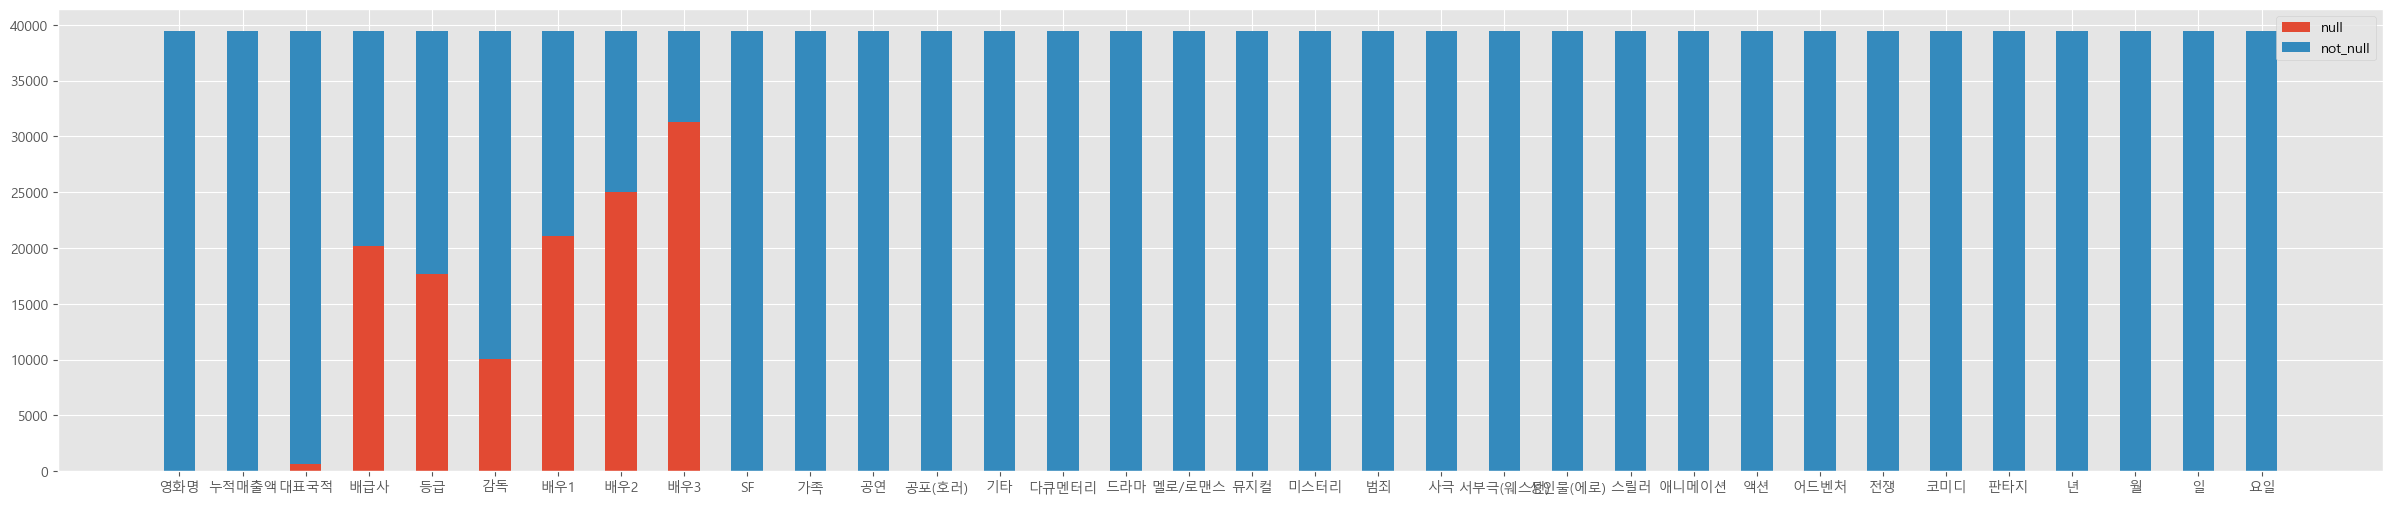

In [66]:
from sklearn.preprocessing import LabelEncoder

df = dataset.copy()

# 제작사 결측치가 대부분이라서 삭제
df = df.drop(['제작사'], axis=1)

# 배우 5명까지 새로운 열로 추가하고 기존 배우 열 삭제
for i in range(1, 4):
    df[f'배우{i}'] = df['배우'].str.split(',').str[i - 1]
df = df.drop(['배우'], axis=1)

# 원-핫 인코딩, 장르를 더미변수로 생성하고 기존 장르 열 삭제
genre = df['장르'].str.get_dummies(sep=',')
df = pd.concat([df, genre], axis=1)
df = df.drop(['장르'], axis=1)

# 감독 1명만 남김
df['감독'] = df['감독'].str.split(',').str[0]

# 배급사 1개만 남김
df['배급사'] = df['배급사'].str.split(',').str[0]

# 관람 등급 1개만 남김
df['등급'] = df['등급'].str.split(',').str[0]

# 개봉일 결측치
df['개봉일'].fillna('1900-01-01', inplace=True)

# 개봉일을 년 / 월 / 일 / 요일로 분리하고 기존 개봉일 열 삭제
df['년'] = df['개봉일'].dt.year
df['월'] = df['개봉일'].dt.month
df['일'] = df['개봉일'].dt.day
df['요일'] = df['개봉일'].dt.weekday    # 0 = 월요일 ~
df = df.drop(['개봉일'], axis=1)

# 누적매출액 없는 행 삭제
df.drop(df[df['누적매출액'] <= 0].index, inplace=True)

# 널 값 비율 그래프
null = df.isnull().sum()
not_null = df.notnull().sum()

plt.figure(figsize=(30, 6))
plt.bar(df.columns, null, label='null', width=0.5)
plt.bar(df.columns, not_null, label='not_null', width=0.5, bottom=null)
plt.legend()

# 라벨 인코딩, 카테고리 변수 수치형으로 변환
categories = df.columns[df.dtypes == "object"]
print(categories)

for cat in categories:
    le = LabelEncoder()

    df[cat].fillna("NaN", inplace=True)
    df[cat] = df[cat].astype(str)
    le = le.fit(df[cat])
    df[cat] = le.transform(df[cat])

# 전처리한 데이터 복사
all_df = df.copy()
all_df.head()

In [67]:
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = all_df.drop(["누적매출액"], axis=1)  # 독립 변수
y = all_df["누적매출액"]                # 종속 변수

folds = 3
kf = KFold(n_splits=folds)

models = []  # fold 별로 작성한 모델을 저장
oof = np.zeros(len(X))  # 해당 데이터를 제외한 나머지 데이터를 이용하여 종속 변수를 예측한 값을 저장
mse = []
mae = []

# lgbm_params = {
#     "objective" : "regression",
#     "random_seed" : 1234,
#     "metric": "mae",
#     "n_estimators" : 20000,
#     "early_stopping_rounds"  : 200,
#     "num_leaves" : 31,
#     "learning_rate" : 0.05,
#     "bagging_fraction" : 0.7,
#     "bagging_seed" : 0,
#     "num_threads" : 4,
#     "colsample_bytree" : 0.7,
#     "min_data_in_leaf" : 1900,
#     "min_split_gain" : 0.00011,
#     "lambda_l2" : 9
# }

lgbm_params = {'num_leaves': 63,
               'max_bin': 120,
               'bagging_fraction': 0.8883805440951686,
               'bagging_freq': 7,
               'feature_fraction': 0.7696317896991509,
               'min_data_in_leaf': 2,
               'min_sum_hessian_in_leaf': 3}


for train_index, val_index in kf.split(X):
    X_train = X.iloc[train_index]
    X_valid = X.iloc[val_index]
    y_train = y.iloc[train_index]
    y_valid = y.iloc[val_index]

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

    model_lgb = lgb.train(lgbm_params,
                          lgb_train,
                          valid_sets=lgb_eval,
                          num_boost_round=1000,
                          callbacks=[lgb.early_stopping(75)]
                          )

    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)

    mse.append(mean_squared_error(y_valid, y_pred))
    mae.append(mean_absolute_error(y_valid, y_pred))

    models.append(model_lgb)
    oof[val_index] = y_pred

mean_mse = np.mean(mse)
mean_mae = np.mean(mae)

print("----------------------------------------------------------------------------------------------------------------------------------------------------")
print("평균 MSE:", mean_mse)
print("평균 MAE:", mean_mae)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 962
[LightGBM] [Info] Number of data points in the train set: 26285, number of used features: 33
[LightGBM] [Info] Start training from score 1118118578.355602
Training until validation scores don't improve for 75 rounds
Early stopping, best iteration is:
[487]	valid_0's l2: 1.94042e+19
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 963
[LightGBM] [Info] Number of data points in the train set: 26285, number of used features: 33
[LightGBM] [Info] Start training from score 1227071863.031729
Training until validation scores don't improve for 75 rounds
Early stopping, best iteration is:
[351]	valid_

<Axes: >

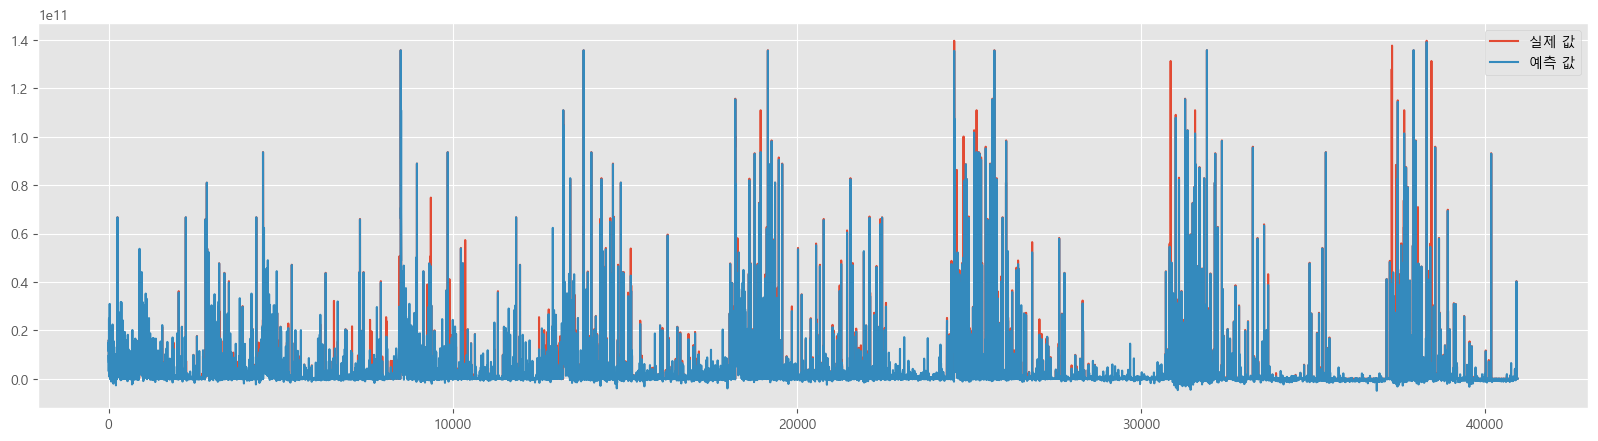

In [68]:
graph = pd.DataFrame({
    "실제 값" : y,
    "예측 값": oof
})

graph.plot(figsize=(20, 5))

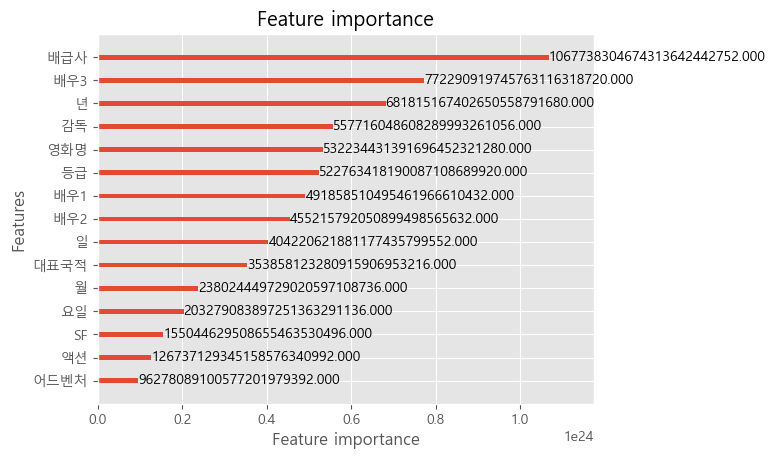

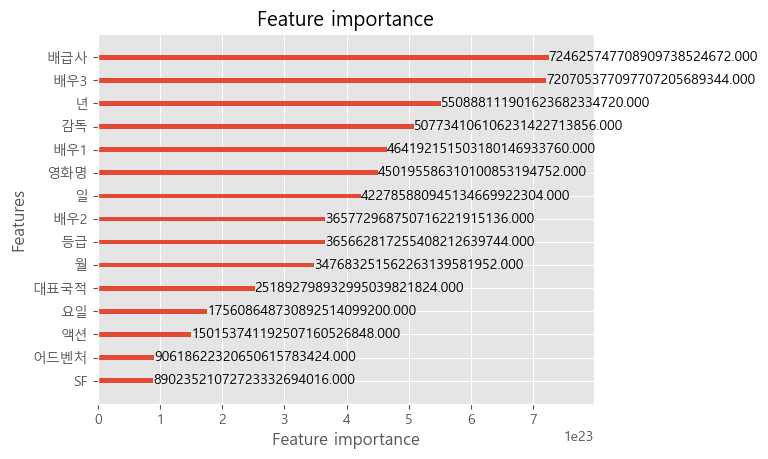

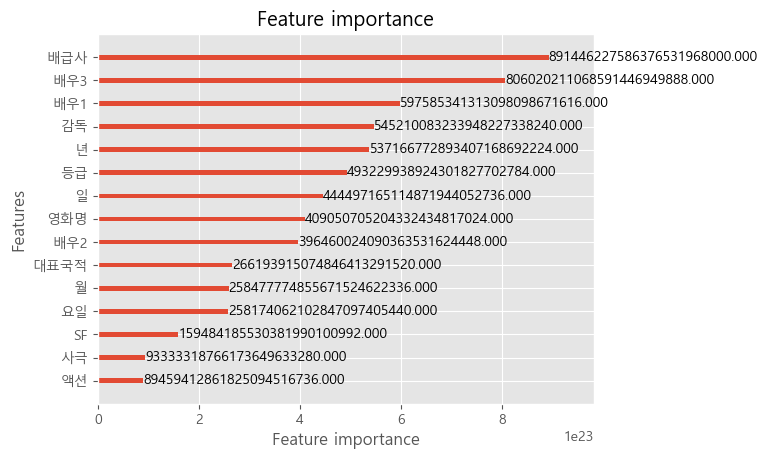

In [69]:
# 각 변수의 중요도 확인

for model in models:
    lgb.plot_importance(model, importance_type="gain", max_num_features=15)

In [31]:
# 평균 MSE: 1.7705146095945654e+19
# 평균 MAE: 896356658.0289588

In [70]:
dataset.head(1)

,영화명,개봉일,누적매출액,대표국적,제작사,배급사,등급,장르,감독,배우
0,태극기 휘날리며,2004-02-05,15687180500,한국,강제규필름,"(주)다자인소프트,(주)쇼박스",15세관람가,"전쟁,드라마",강제규,"장동건,원빈,이은주,공형진,조원희,이장욱,이영란,정희준,박유신,김효열,김효준,최재혁..."


In [75]:
df = dataset.copy()

df = df.drop(['제작사'], axis=1)

for i in range(1, 4):
    df[f'배우{i}'] = df['배우'].str.split(',').str[i - 1]

df = df.drop(['배우'], axis=1)

genre = df['장르'].str.get_dummies(sep=',')
df = pd.concat([df, genre], axis=1)
df = df.drop(['장르'], axis=1)

df['감독'] = df['감독'].str.split(',').str[0]

df['배급사'] = df['배급사'].str.split(',').str[0]

df['등급'] = df['등급'].str.split(',').str[0]
# ------------------------------------------------------------------------------------------------------------------------------------------------

# 예측 데이터 전처리

test = pd.DataFrame(dataset.iloc[9999])
test = test.T
test = test.drop(['제작사'], axis=1)
test = test.drop(['누적매출액'], axis=1)

for i in range(1, 4):
    test[f'배우{i}'] = test['배우'].str.split(',').str[i - 1]

test = test.drop(['배우'], axis=1)

genre = ["SF","가족","공연","공포(호러)","기타","다큐멘터리","드라마","멜로/로맨스","뮤지컬","미스터리","범죄","사극","서부극(웨스턴)","성인물(에로)","스릴러","애니메이션","액션","어드벤처","전쟁","코미디","판타지"]
g = test['장르'].str.split(',')

for i in genre:
    test[i] = test['장르'].apply(lambda x: i in x).astype(int)

test = test.drop(['장르'], axis=1)

test['감독'] = test['감독'].str.split(',').str[0]

test['배급사'] = test['배급사'].str.split(',').str[0]

test['등급'] = test['등급'].str.split(',').str[0]

test['개봉일'] = pd.to_datetime(test['개봉일'])
test['년'] = test['개봉일'].dt.year
test['월'] = test['개봉일'].dt.month
test['일'] = test['개봉일'].dt.day
test['요일'] = test['개봉일'].dt.dayofweek    # 0 = 월요일 ~
test = test.drop(['개봉일'], axis=1)

categories = ['영화명', '대표국적', '배급사', '등급', '감독', '배우1', '배우2', '배우3']

le = LabelEncoder()
for cat in categories:
    
    test[cat].fillna("NaN", inplace=True)
    df[cat].fillna("NaN", inplace=True)
    df[cat] = df[cat].astype(str)
    le = le.fit(df[cat])
    test[cat] = le.transform(test[[cat]])

columns_order = ['영화명', '대표국적', '배급사', '등급', '감독', '배우1', '배우2', '배우3', 'SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로/로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)', '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지', '년', '월', '일', '요일']
test = test.reindex(columns=columns_order)

result = []
for model in models:
    y_pred = model.predict(test.values.reshape(1, -1), num_iteration=model_lgb.best_iteration)
    print(y_pred)
    result.append(y_pred)

print(np.mean(result))

[65273478.28754627]
[15262074.01639856]
[1.08360039e+08]
62965197.07690948


C:\Users\USER\AppData\Local\Temp\ipykernel_15224\2010258310.py:59: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test[cat].fillna("NaN", inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_15224\2010258310.py:60: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

In [ ]:
test
# 108360039
# 1120000

In [72]:
dataset.iloc[9999]

영화명          데드 스노우 2
개봉일               NaT
누적매출액         1120000
대표국적             노르웨이
제작사               NaN
배급사         (주)버킷스튜디오
등급            청소년관람불가
장르             공포(호러)
감독            토미 위르콜라
배우       마틴 스타,데릭 미어스
Name: 9999, dtype: object

In [ ]:
# 하이퍼 파라미터 튜닝

import optuna
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1234, shuffle=False, stratify=None)

def objective(trial):
    params = {
        'objective': 'regression',
        'random_seed' : 1234,
        'learning_rate' : 0.05,
        'n_estimators' : 1000,
        'num_leaves': trial.suggest_int('num_leaves', 4, 64),
        'max_bin' : trial.suggest_int('max_bin', 50, 200),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
        'min_data_in_leaf' : trial.suggest_int('min_data_in_leaf', 2, 16),
        'min_sum_hessian_in_leaf' : trial.suggest_int('min_sum_hessian_in_leaf', 1, 10),
    }
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
    
    model_lgb = lgb.train(params,
                         lgb_train,
                         valid_sets=lgb_eval,
                         num_boost_round=100
                         )
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    score = np.sqrt(mean_squared_error(y_valid, y_pred))
    return score

# study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=0))
# study.optimize(objective, n_trials=50)
# study.best_params

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# {'num_leaves': 63,
#  'max_bin': 120,
#  'bagging_fraction': 0.8883805440951686,
#  'bagging_freq': 7,
#  'feature_fraction': 0.7696317896991509,
#  'min_data_in_leaf': 2,
#  'min_sum_hessian_in_leaf': 3}